##

# Velocizzare il KNN con i kd-alberi

I kd-alberi sono delle strutture dati per dati multidimensionali, dove k indica la dimensione.
Ad ogni livello dell' albero c'è l'ordinamento rispetto ad una ed una sola dimensione, nel livello sottostante l'ordinamento rispetto alla prossima dimensione e così via in maniera ciclica.
In 2D ogni nodo rappresenta una retta separatrice del piano.

![kd-albero](kdtree.webp)

Con dati **ordinati** le ricerche possono essere fatte più velocemente, in particolare in $O(log_2 n)$.
Il KNN può essere visto come un problema di ricerca e possiamo quindi attraversare l'albero in maniera opportuna per trovare i vicini.

## Algoritmo
Supponiamo di voler cercare il NN del punto P:

1. Effettuare una ricerca senza successo e arrivare ad una foglia, tale foglia sarà l'attuale miglior match del punto da cercare.
2. Verificare che l'ipersfera di centro P e raggio $dist(P,best)$ non intersechi un'altro iperpiano. Risalire l'albero ed eliminare l'intero sottoalbero, altrimenti andare nell'altro sottoalbero.
3. La ricerca termina una volta terminato il processo per la radice.

Il costo è $O(nlog_2 n)$.



![ricerca](kd_tree_search.webp)

-----------------KNeighborsClassifier-----------------
Model: KNeighborsClassifier, accuracy: 0.816
Number of mislabeled values out of a total 38 values : 7
---------------------------------------------------------


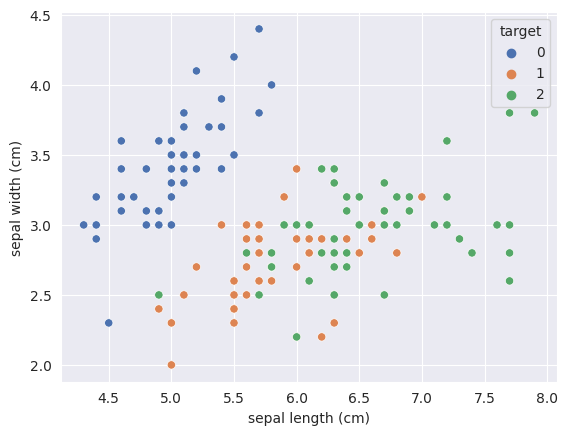

<Figure size 1000x1000 with 0 Axes>

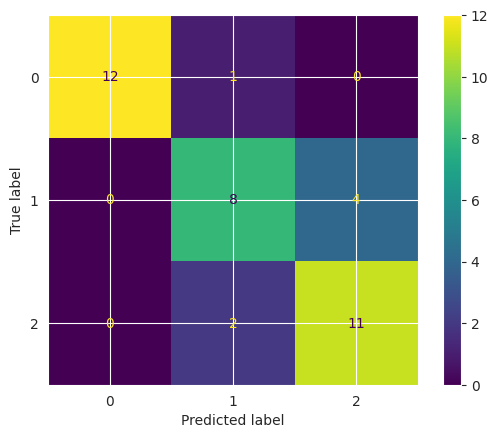

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=111)

sns.set_style('darkgrid')
sns.scatterplot(x=X["sepal length (cm)"],y=X["sepal width (cm)"], hue=y,palette="deep")


print("-----------------KNeighborsClassifier-----------------")    
knn = KNeighborsClassifier(n_neighbors=10,algorithm="kd_tree").fit(X_train,y_train)
predict = knn.predict(X_test)
acc = accuracy_score(y_test, predict)
print("Model: {name}, accuracy: {acc}".format(name='KNeighborsClassifier',acc=round(acc,3)))
print("Number of mislabeled values out of a total %d values : %d"% (X_test.shape[0], (y_test != predict).sum()))
print("---------------------------------------------------------")

plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.show()



In [2]:
%timeit knn = KNeighborsClassifier(n_neighbors=10,algorithm="brute").fit(X_train,y_train).predict(X_test)
%timeit knn = KNeighborsClassifier(n_neighbors=10,algorithm="kd_tree").fit(X_train,y_train).predict(X_test)

2.52 ms ± 97 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.44 ms ± 47.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Curiosità
Questa struttura dati viene usata anche per modellare le collisioni e in passato è stata usata per il ray tracing, ma poi rimpiazzata da strutture dati ad hardware.

# References
1. [kd-alberi](https://en.wikipedia.org/wiki/K-d_tree)
2. [Immagini](https://www.baeldung.com/cs/k-d-trees)

